In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Microsoft YaHei']  # 任选系统里确实存在的中文字体
mpl.rcParams['axes.unicode_minus'] = False   # 让负号正常显示

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_name_day = "57_日级别.xlsx" 
file_name_mon = "57_月级别.xlsx"

df_day = pd.read_excel(file_name_day) #read files
df_day = df_day.pivot(index='time', columns='index_name', values='value')

df_mon = pd.read_excel(file_name_mon)
df_mon = df_mon.pivot(index='time', columns='index_name', values='value')
df_mon = df_mon.reset_index()  #turn index back into a regular column
df_mon = df_mon.sort_values("time")  #sort by ascending order of time
df_mon = df_mon.set_index("time")  #turn column back into index
df_mon

index_name,M1(货币):同比,M1(货币):期末值,M2(货币和准货币):期末值,二手住房价格指数(上年同期=100),二手住房价格指数(上月=100),社会融资规模存量:期末同比
time,,,,,,
2012-03-31,4.4,NaN,NaN,NaN,NaN,NaN
2012-04-30,3.1,NaN,NaN,NaN,NaN,NaN
2012-05-31,3.5,NaN,NaN,NaN,NaN,NaN
2012-06-30,4.7,NaN,NaN,NaN,NaN,NaN
2012-07-31,4.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-12-31,1.2,1113069.00,3135322.30,91.891429,99.685714,8.0
2025-01-31,0.4,1124457.45,3185247.18,92.204286,99.660000,8.0
2025-02-28,0.1,1094370.01,3205173.24,92.468571,99.655714,8.2


#### 处理月数据

In [3]:
def gen_agg_time(df, col, freq="M", to_ts=False, how="start"):
    """
    将 df[col] 聚合到指定频率的 Pandas PeriodIndex。必要时再转 Timestamp。
    参数
    ----
    df   : DataFrame
    col  : str，要聚合的列名
    freq : str，"M" 月度, "Q" 季度, "A" 年度, "W" 周度 …
    to_ts: bool，True 则 Period → Timestamp
    how  : {"start", "end"}，to_ts 时取周期首日还是末日
    """
    ser = pd.to_datetime(df[col]).dt.to_period(freq)
    if to_ts:
        return ser.dt.to_timestamp("MS" if how == "start" else freq)
    return ser


In [4]:
df_mon['m1_roll'] = df_mon['M1(货币):同比']
df_mon['m2_roll'] = df_mon['M2(货币和准货币):期末值'].rolling(window=12).apply(
    lambda x: (x[-1] / x[0] - 1) * 100
)
df_mon["m1_m2"] = df_mon['m1_roll'] - df_mon['m2_roll']

# 处理月份时间
df_mon = df_mon.reset_index()
df_mon["time"] = gen_agg_time(df_mon, "time", "M") #grouping time to the month level
df_mon = df_mon.set_index("time")
df_mon

index_name,M1(货币):同比,M1(货币):期末值,M2(货币和准货币):期末值,二手住房价格指数(上年同期=100),二手住房价格指数(上月=100),社会融资规模存量:期末同比,m1_roll,m2_roll,m1_m2
time,,,,,,,,,
2012-03,4.4,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN
2012-04,3.1,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN
2012-05,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN
2012-06,4.7,NaN,NaN,NaN,NaN,NaN,4.7,NaN,NaN
2012-07,4.6,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-12,1.2,1113069.00,3135322.30,91.891429,99.685714,8.0,1.2,5.344715,-4.144715
2025-01,0.4,1124457.45,3185247.18,92.204286,99.660000,8.0,0.4,6.331817,-5.931817
2025-02,0.1,1094370.01,3205173.24,92.468571,99.655714,8.2,0.1,5.158253,-5.058253


In [5]:
df_mon.dropna(inplace=True)

In [6]:
df_mon

index_name,M1(货币):同比,M1(货币):期末值,M2(货币和准货币):期末值,二手住房价格指数(上年同期=100),二手住房价格指数(上月=100),社会融资规模存量:期末同比,m1_roll,m2_roll,m1_m2
time,,,,,,,,,
2013-12,9.3,3.372910e+05,1.106525e+06,105.200000,100.300000,17.500000,9.3,11.530325,-2.230325
2014-12,3.2,3.480564e+05,1.228375e+06,96.100000,99.700000,14.300000,3.2,9.332587,-6.132587
2015-03,2.9,3.372105e+05,1.275333e+06,94.800000,99.900000,13.100000,2.9,9.113531,-6.213531
2015-06,4.3,3.560829e+05,1.333375e+06,95.800000,100.300000,12.000000,4.3,11.649672,-7.349672
2015-09,11.4,3.644169e+05,1.359824e+06,99.100000,100.200000,12.468509,11.4,13.390834,-1.990834
...,...,...,...,...,...,...,...,...,...
2024-11,-0.7,1.076379e+06,3.119587e+06,91.457143,99.652857,7.800000,-0.7,6.735999,-7.435999
2024-12,1.2,1.113069e+06,3.135322e+06,91.891429,99.685714,8.000000,1.2,5.344715,-4.144715
2025-01,0.4,1.124457e+06,3.185247e+06,92.204286,99.660000,8.000000,0.4,6.331817,-5.931817


#### 处理日数据

In [7]:
df_day = df_day.reset_index()
df_day["agg_mon"] = gen_agg_time(df_day, "time", "M")
df_fr007 = df_day.groupby("agg_mon")["利率互换:FR007:1年"].mean().to_frame() #daily to monthly

#### 生成准标签

In [8]:
df_10y = df_day.groupby("agg_mon")["国债到期收益率:10年"].mean().to_frame() #每月国债10年到期收益率

#### 组合成一张表

In [9]:
df_ms = pd.concat([df_mon, df_fr007, df_10y], axis=1)
### df_ms.to_csv("temp1.csv")
df_ms = df_ms.loc['2015-12':'202505']    ###通过上面的temp1.csv 文件发现原始数据从2016/1-2025/3是全的
df_ms.dropna(inplace=True)
df_ms

,M1(货币):同比,M1(货币):期末值,M2(货币和准货币):期末值,二手住房价格指数(上年同期=100),二手住房价格指数(上月=100),社会融资规模存量:期末同比,m1_roll,m2_roll,m1_m2,利率互换:FR007:1年,国债到期收益率:10年
2015-12,15.2,4.009534e+05,1.392278e+06,101.100000,100.200000,12.480869,15.2,12.035621,3.164379,2.322795,2.950609
2016-01,18.6,4.126856e+05,1.416320e+06,101.800000,100.300000,13.100000,18.6,12.640491,5.959509,2.295178,2.827685
2016-02,17.4,3.925047e+05,1.424619e+06,102.600000,100.400000,12.700000,17.4,11.705643,5.694357,2.308894,2.861711
2016-03,22.1,4.115813e+05,1.446198e+06,103.600000,100.800000,13.400000,22.1,12.915489,9.184511,2.296396,2.862996
2016-04,22.9,4.135048e+05,1.445210e+06,104.200000,100.700000,13.100000,22.9,10.544319,12.355681,2.454895,2.919520
...,...,...,...,...,...,...,...,...,...,...,...
2024-11,-0.7,1.076379e+06,3.119587e+06,91.457143,99.652857,7.800000,-0.7,6.735999,-7.435999,1.653486,2.088876
2024-12,1.2,1.113069e+06,3.135322e+06,91.891429,99.685714,8.000000,1.2,5.344715,-4.144715,1.492909,1.799659
2025-01,0.4,1.124457e+06,3.185247e+06,92.204286,99.660000,8.000000,0.4,6.331817,-5.931817,1.564295,1.637768
2025-02,0.1,1.094370e+06,3.205173e+06,92.468571,99.655714,8.200000,0.1,5.158253,-5.058253,1.699026,1.671942


#### 相关性可视化

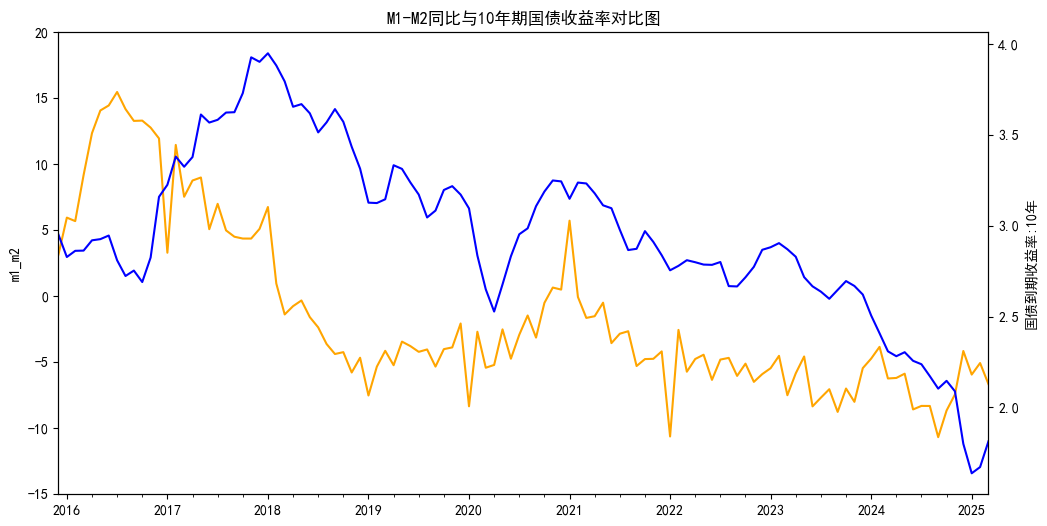

In [22]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax = df_ms["m1_m2"].plot(
    ax=ax,
    ylabel="m1_m2",
    title="M1-M2同比与10年期国债收益率对比图",
    c="orange"
)
ax.set_ylim(-15, 20)  # 设置左侧y轴范围
df_ms["国债到期收益率:10年"].plot(
    secondary_y=True,
    ax=ax,
    ylabel="国债到期收益率:10年",
    c="blue"
)

# Save the figure
plt.savefig("M1-M2同比与10年期国债收益率对比.png", dpi=300, bbox_inches='tight')

plt.show()

#### 散点图

,m1_m2,国债到期收益率:10年
m1_m2,1.000000,0.381765
国债到期收益率:10年,0.381765,1.000000


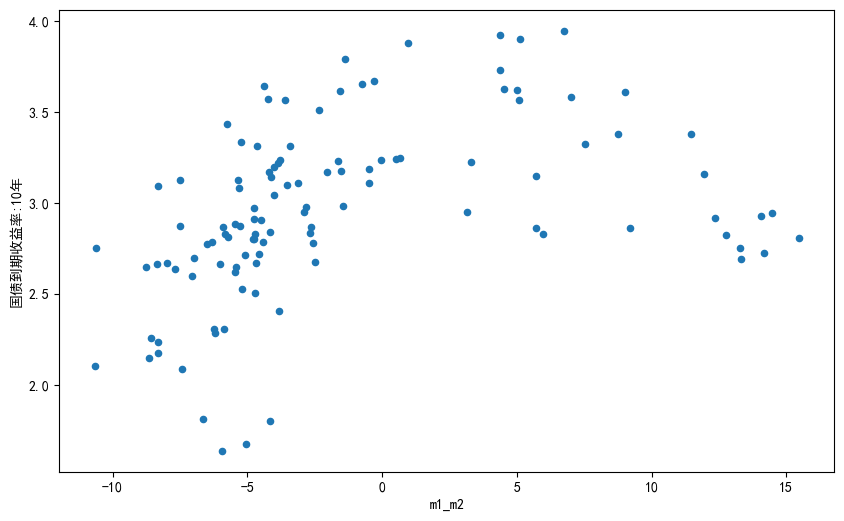

In [11]:
df_ms[["m1_m2", "国债到期收益率:10年"]].plot(kind='scatter', x='m1_m2', y='国债到期收益率:10年', figsize=(10,6))

df_ms[["m1_m2", "国债到期收益率:10年"]].corr()

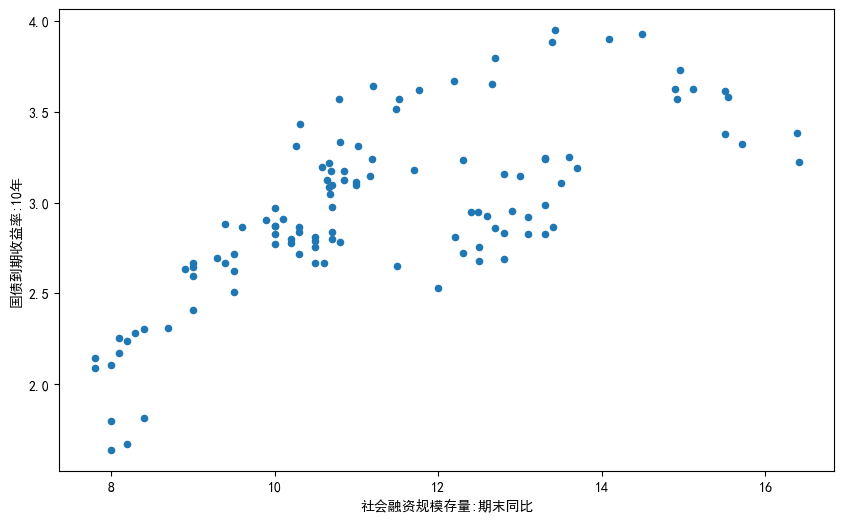

,社会融资规模存量:期末同比,国债到期收益率:10年
社会融资规模存量:期末同比,1.00000,0.71993
国债到期收益率:10年,0.71993,1.00000


In [12]:
df_ms[["社会融资规模存量:期末同比", "国债到期收益率:10年"]].plot(kind='scatter', x='社会融资规模存量:期末同比', y='国债到期收益率:10年', figsize=(10,6))
plt.show()

df_ms[["社会融资规模存量:期末同比", "国债到期收益率:10年"]].corr()

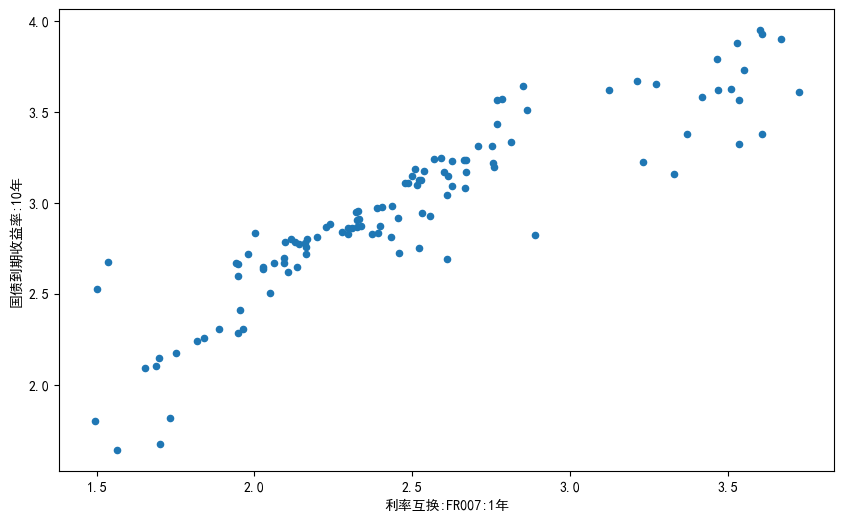

,利率互换:FR007:1年,国债到期收益率:10年
利率互换:FR007:1年,1.000000,0.898775
国债到期收益率:10年,0.898775,1.000000


In [13]:
df_ms[["利率互换:FR007:1年", "国债到期收益率:10年"]].plot(kind='scatter', x='利率互换:FR007:1年', y='国债到期收益率:10年', figsize=(10,6))
plt.show()

df_ms[["利率互换:FR007:1年", "国债到期收益率:10年"]].corr()


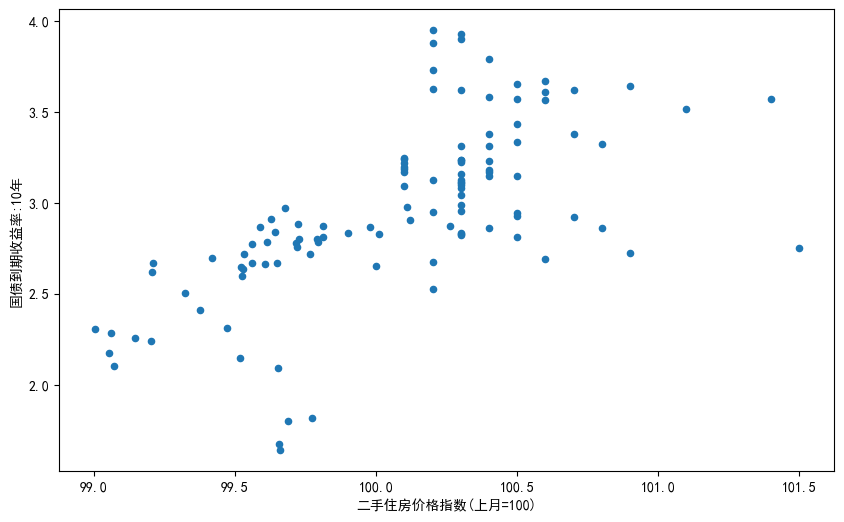

,二手住房价格指数(上月=100),国债到期收益率:10年
二手住房价格指数(上月=100),1.000000,0.648756
国债到期收益率:10年,0.648756,1.000000


In [14]:
df_ms[["二手住房价格指数(上月=100)", "国债到期收益率:10年"]].plot(kind='scatter', x='二手住房价格指数(上月=100)', y='国债到期收益率:10年', figsize=(10,6))
plt.show()

df_ms[["二手住房价格指数(上月=100)", "国债到期收益率:10年"]].corr()

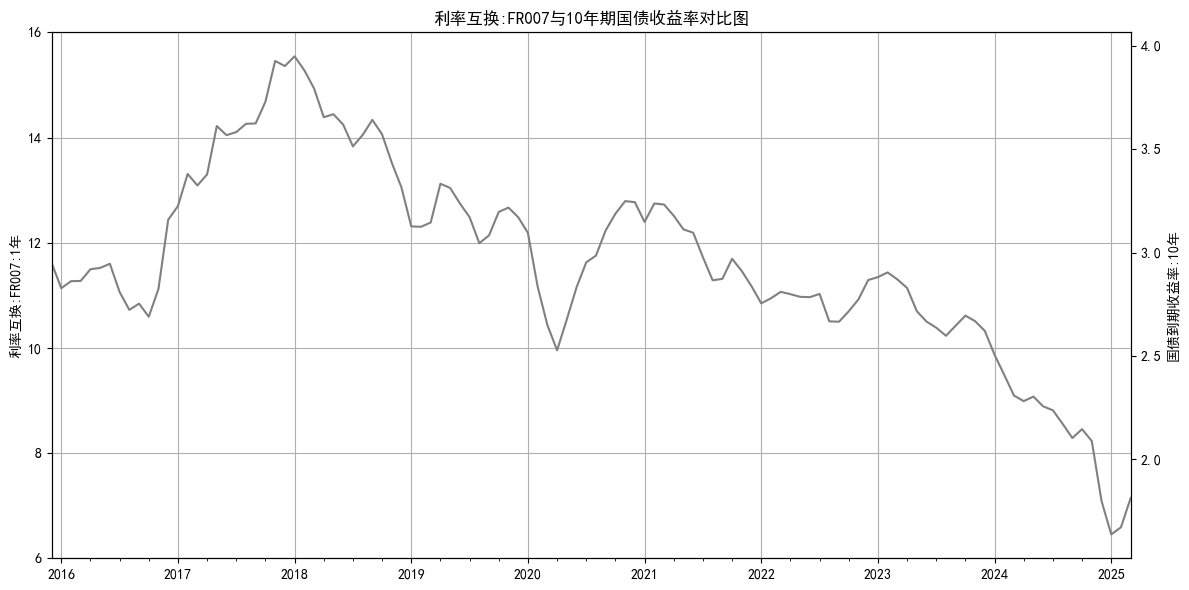

In [23]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax = df_ms["利率互换:FR007:1年"].plot(
    ax=ax,
    ylabel="利率互换:FR007:1年",
    title="利率互换:FR007与10年期国债收益率对比图",
    c="orange"
)
ax.set_ylim(6, 16)  # 设置左侧y轴范围
df_ms["国债到期收益率:10年"].plot(
    secondary_y=True,
    ax=ax,
    ylabel="国债到期收益率:10年",
    c="gray"
)

ax.grid(True)
ax.right_ax.grid(False)

plt.tight_layout()

# Save the figure
plt.savefig("利率互换:FR007与10年期国债收益率对比.png", dpi=300, bbox_inches='tight')

plt.show()

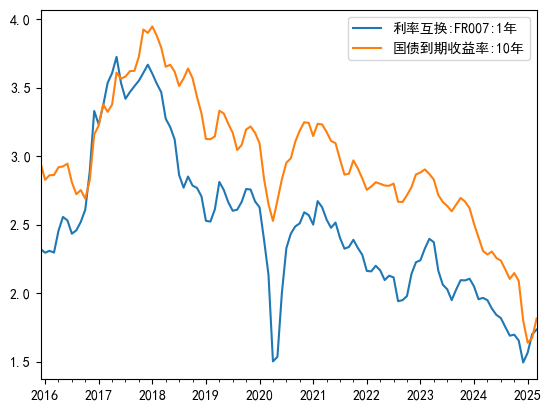

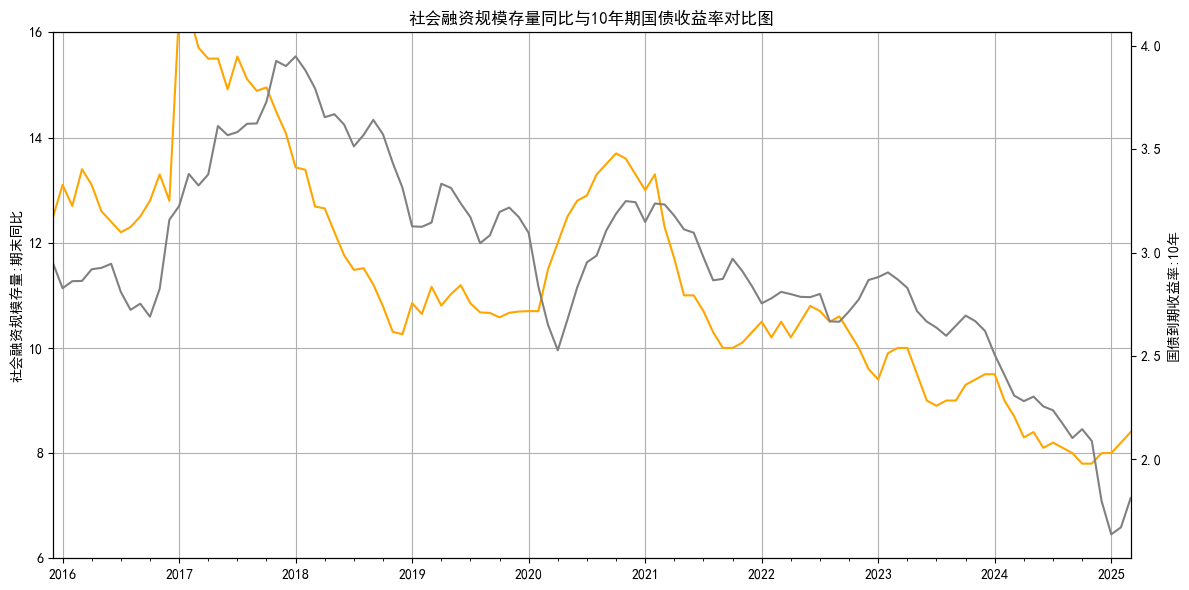

In [24]:
cols = ["利率互换:FR007:1年", "国债到期收益率:10年"]

df_ms.iloc[:, [9, 10]].plot()  # 只画原始曲线
# Save the figure
plt.savefig("利率互换:FR007与10年期国债收益率对比.png", dpi=300, bbox_inches='tight')
plt.show()

#plt.figure(figsize=(8,5))          # ← 关键：重新开一张图

fig, ax = plt.subplots(figsize=(12, 6)) 
ax = df_ms["社会融资规模存量:期末同比"].plot(
    ax=ax,
    ylabel="社会融资规模存量:期末同比",
    title="社会融资规模存量同比与10年期国债收益率对比图",
    c="orange"
)
ax.set_ylim(6, 16)  # 设置左侧y轴范围
df_ms["国债到期收益率:10年"].plot(
    secondary_y=True,
    ax=ax,
    ylabel="国债到期收益率:10年",
    c="gray"
)

ax.grid(True)
ax.right_ax.grid(False)

plt.tight_layout()

# Save the figure
plt.savefig("社会融资规模存量同比与10年期国债收益率对比.png", dpi=300, bbox_inches='tight')

plt.show()



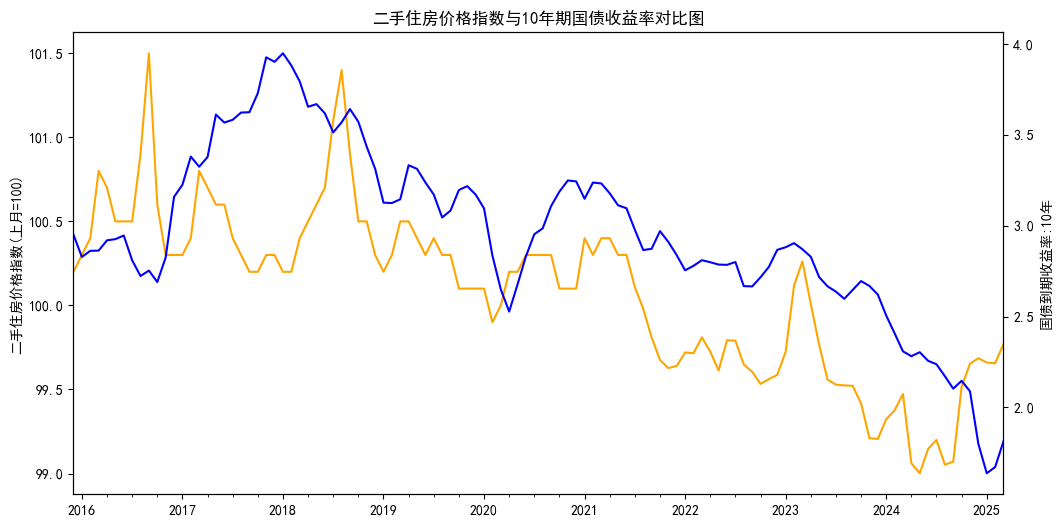

In [16]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax = df_ms["二手住房价格指数(上月=100)"].plot(
    ax=ax,
    ylabel="二手住房价格指数(上月=100)",
    title="二手住房价格指数与10年期国债收益率对比图",
    c="orange"
)
#ax.set_ylim(-15, 20)  # 设置左侧y轴范围
df_ms["国债到期收益率:10年"].plot(
    secondary_y=True,
    ax=ax,
    ylabel="国债到期收益率:10年",
    c="blue"
)
# Save the figure
plt.savefig("二手住房价格指数与10年期国债收益率对比.png", dpi=300, bbox_inches='tight')
plt.show()

#### 生成模型训练的数据集

In [48]:
df_ms["社融存量同比_3M"] = df_ms["社会融资规模存量:期末同比"].shift(1)  #领先3年
df_ms["m1_m2_2M"] = df_ms["m1_m2"].shift(1) 
df_ms["二手住房价格指数环比_2M"] = (df_ms["二手住房价格指数(上月=100)"] - 100).shift(1)
df_ms["FR007_2M"] = df_ms["利率互换:FR007:1年"].shift(1)
# 构建数据集
df_ms["label"] = df_ms["国债到期收益率:10年"].pct_change()  #收益率变化
df_ms["label_final"] = df_ms["label"].apply(lambda x: 0 if x < 0 else 1)

#### 拆分数据集

In [49]:
df_data = df_ms.loc["2016-03":"2025-04", ['社融存量同比_3M', 'm1_m2_2M', '二手住房价格指数环比_2M',
                                          'FR007_2M', 'label_final']]
# for col in ['社融存量同比_3M', 'm1_m2_2M', '二手住房价格指数环比_2M',
#                                              'FR007_2M']:
#     df_data[col] = (df_data[col] - df_data[col].mean())/ (df_data[col].std() + 1e-8)

num = 50  #train 50, test 50
train_x = df_data.iloc[:num, :4]
train_y = df_data.iloc[:num, 4:]
test_x = df_data.iloc[num:, :4]
test_y = df_data.iloc[num:, 4:]

In [50]:
from sklearn.model_selection import train_test_split

X = df_data.iloc[:, :4]
y = df_data.iloc[:, 4]

# 先划出测试集 20%
X_temp, test_x, y_temp, test_y = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 再从剩下的 temp 里划验证集 25% (相当于总样本的 20%)
train_x, val_x, train_y, val_y = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)



#### 自定义验证集

In [51]:
df_data = df_ms.loc["2016-03":"2024-06", ['社融存量同比_3M', 'm1_m2_2M', '二手住房价格指数环比_2M',
                                          'FR007_2M', 'label_final']]
df_data_valid = df_ms.loc["2024-07":"2025-04", ['社融存量同比_3M', 'm1_m2_2M', '二手住房价格指数环比_2M',
                                          'FR007_2M', 'label_final']]
# for col in ['社融存量同比_3M', 'm1_m2_2M', '二手住房价格指数环比_2M',
#                                              'FR007_2M']:
#     df_data[col] = (df_data[col] - df_data[col].mean())/ (df_data[col].std() + 1e-8)

num = 50  #train 50, test 50
num_val=10
train_x = df_data.iloc[:num, :4]
train_y = df_data.iloc[:num, 4:]
test_x = df_data.iloc[num:, :4]
test_y = df_data.iloc[num:, 4:]
val_x=df_data_valid.iloc[:num_val, :4]
val_y=df_data_valid.iloc[:num_val, 4:]

#### 训练评估

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=10)
model.fit(train_x, train_y)

threshold = 0.5
positive_proba = model.predict_proba(test_x)[:, 1]
y_pred = (positive_proba >= threshold).astype(int)
# 评估模型
print("准确率:", accuracy_score(test_y, y_pred))
print("混淆矩阵:\n", confusion_matrix(test_y, y_pred))
print("分类报告:\n", classification_report(test_y, y_pred))

print("系数:", model.coef_)
print("截距:", model.intercept_)

准确率: 0.6
混淆矩阵:
 [[26  3]
 [17  4]]
分类报告:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        29
           1       0.57      0.19      0.29        21

    accuracy                           0.60        50
   macro avg       0.59      0.54      0.50        50
weighted avg       0.59      0.60      0.54        50

系数: [[ 0.101476    0.09486285  0.16983599 -0.41947089]]
截距: [-0.22746216]


#### 验证

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=10)
model.fit(train_x, train_y)

threshold = 0.5
positive_proba = model.predict_proba(val_x)[:, 1]
y_pred = (positive_proba >= threshold).astype(int)
# 评估模型
print("准确率:", accuracy_score(val_y, y_pred))
print("混淆矩阵:\n", confusion_matrix(val_y, y_pred))
print("分类报告:\n", classification_report(val_y, y_pred))

print("系数:", model.coef_)
print("截距:", model.intercept_)

准确率: 0.6666666666666666
混淆矩阵:
 [[6 0]
 [3 0]]
分类报告:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9

系数: [[ 0.101476    0.09486285  0.16983599 -0.41947089]]
截距: [-0.22746216]
